<a href="https://colab.research.google.com/github/haaraamk/DLforAI_class01/blob/main/chapter05_fundamentals_of_ml_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
# TensorFlow Keras에서 MNIST 데이터셋을 불러옵니다.
from tensorflow.keras.datasets import mnist
import numpy as np

# train_images와 train_labels은 훈련에 사용할 이미지와 레이블 데이터입니다.
# 테스트 데이터는 사용하지 않으므로 버립니다.
(train_images, train_labels), _ = mnist.load_data()

# 훈련 이미지를 28x28 크기에서 784 크기의 1차원 배열로 변환합니다.
train_images = train_images.reshape((60000, 28 * 28))

# 훈련 이미지의 픽셀 값을 0과 1 사이의 값으로 정규화합니다.
train_images = train_images.astype("float32") / 255

# train_images에 임의의 노이즈를 추가하는 작업입니다.
# np.random.random 함수를 사용하여 0과 1 사이의 값을 가진 임의의 노이즈를 생성합니다.
# 생성한 노이즈 배열과 원래 이미지 배열을 concatenate 함수를 사용하여 열 축을 따라 합칩니다.
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# train_images에 0 값을 추가하는 작업입니다.
# np.zeros 함수를 사용하여 0으로 채워진 배열을 생성합니다.
# 생성한 0 값 배열과 원래 이미지 배열을 concatenate 함수를 사용하여 열 축을 따라 합칩니다.
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6166 - accuracy: 0.8110 - val_loss: 0.3078 - val_accuracy: 0.9037
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.9230 - val_loss: 0.1858 - val_accuracy: 0.9453
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9493 - val_loss: 0.1639 - val_accuracy: 0.9526
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1167 - accuracy: 0.9642 - val_loss: 0.1611 - val_accuracy: 0.9507
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0846 - accuracy: 0.9734 - val_loss: 0.1296 - val_accuracy: 0.9617
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0620 - accuracy: 0.9796 - val_loss: 0.1293 - val_accuracy: 0.9613
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.1170 - val_accuracy: 0.9661
Epoch 

In [ ]:
# TensorFlow와 TensorFlow Keras에서 layers 모듈을 가져옵니다.
from tensorflow import keras
from tensorflow.keras import layers

# 모델 아키텍처를 정의하는 함수입니다.
# Sequential 모델을 사용하여 layers.Dense로 이루어진 MLP(Multi-Layer Perceptron) 모델을 정의합니다.
# 입력 레이어의 노드 수는 784개이며, 출력 레이어의 노드 수는 10개입니다.
# 활성화 함수로는 ReLU를 사용합니다.
# 모델의 optimizer는 rmsprop을 사용하고, loss function은 sparse_categorical_crossentropy를 사용합니다.
# 모델의 평가 지표는 accuracy로 설정합니다.
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# get_model 함수를 사용하여 모델을 생성합니다.
# train_images_with_noise_channels로 모델을 훈련합니다.
# epoch 횟수는 10회, 배치 크기는 128로 설정하고, 훈련 데이터 중 20%를 검증 데이터로 사용합니다.
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# get_model 함수를 사용하여 모델을 생성합니다.
# train_images_with_zeros_channels로 모델을 훈련합니다.
# epoch 횟수는 10회, 배치 크기는 128로 설정하고, 훈련 데이터 중 20%를 검증 데이터로 사용합니다.
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


**Plotting a validation accuracy comparison**

유효성 검사 정확도 비교 표시

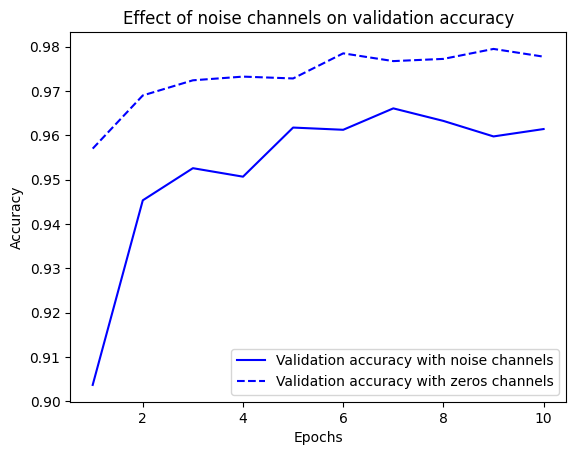

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# Matplotlib을 사용하여 그래프를 그립니다.
# 첫 번째 그래프는 train_images_with_noise_channels 데이터를 사용하여 학습한 모델의 검증 정확도(validation accuracy)를 나타냅니다.
# 두 번째 그래프는 train_images_with_zeros_channels 데이터를 사용하여 학습한 모델의 검증 정확도를 나타냅니다.
# epochs은 1부터 10까지의 정수 리스트입니다.
# 첫 번째 그래프는 파란색 실선으로, "Validation accuracy with noise channels" 라벨을 붙여서 나타냅니다.
# 두 번째 그래프는 파란색 점선으로, "Validation accuracy with zeros channels" 라벨을 붙여서 나타냅니다.
# 그래프의 제목은 "Effect of noise channels on validation accuracy"로 설정하고, x축은 "Epochs"로, y축은 "Accuracy"로 라벨링합니다.
# 두 그래프에 대한 범례(legend)를 표시합니다.

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

# MNIST 데이터셋을 로드하고, train_images와 train_labels로 나눕니다.
# train_images를 28x28 크기의 60,000개의 이미지 배열로 변환합니다.
# 이후, train_images를 255로 나누어 0에서 1사이의 값으로 스케일링합니다.
# random_train_labels은 train_labels를 복사하여 만든 배열로, train_labels의 값을 랜덤하게 섞은 것입니다.
# Dense 레이어를 2개로 쌓아 신경망을 만듭니다. 두 레이어는 각각 512와 10개의 노드를 가집니다.
# 마지막 레이어는 10개의 노드를 가지며, softmax 활성화 함수를 사용합니다.
# 모델을 컴파일합니다. 오차 함수는 sparse_categorical_crossentropy, 옵티마이저는 rmsprop을 사용하며, 평가 지표는 accuracy입니다.
# train_images와 random_train_labels를 사용하여 모델을 학습합니다.
# 100 에포크를 수행하며, 배치 크기는 128로 지정하고, 학습 데이터의 20%를 검증 데이터로 사용합니다.

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary

#TRY
-From Training the same model on MNIST data with noise channels or all-zero channels Add validation accuracy of original data for mnistdata.

-Fitting a MNIST model with randomly shuffled labels.Visualize training accuracy and validation accuracy




11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
375/375 [==============================] - 9s 5ms/step - loss: 2.3152 - accuracy: 0.1025 - val_loss: 2.3055 - val_accuracy: 0.1091
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2993 - accuracy: 0.1168 - val_loss: 2.3116 - val_accuracy: 0.1052
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2922 - accuracy: 0.1247 - val_loss: 2.3208 - val_accuracy: 0.1005
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2802 - accuracy: 0.1379 - val_loss: 2.3250 - val_accuracy: 0.1026
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2650 - accuracy: 0.1489 - val_loss: 2.3310 - val_accuracy: 0.1031
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2468 - accuracy: 0.1616 - val_loss: 2.3413 - val_accuracy: 0.1029
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2249 - 

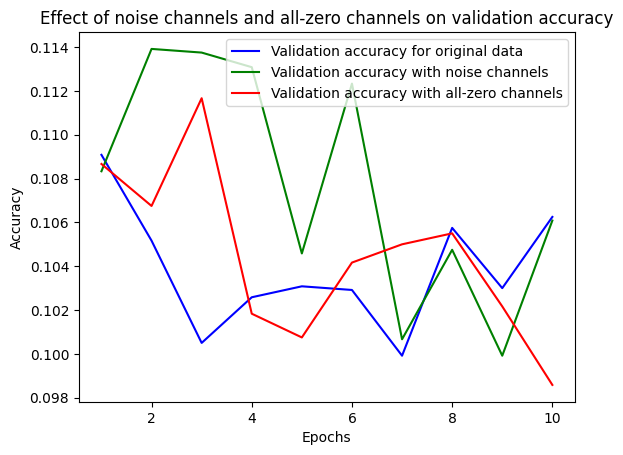

In [1]:
# TRY1_From Training the same model on MNIST data with noise channels or all-zero channels Add validation accuracy of original data for mnistdata.

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Add noise channels and all-zero channels to the training data
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

# Shuffle the labels randomly
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

# Train the model on the original data with validation accuracy
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_images, train_labels,
                             epochs=10,
                             batch_size=128,
                             validation_split=0.2)

# Train the model on the data with noise channels and get the validation accuracy
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_noise = model.fit(train_images_with_noise_channels, train_labels,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)
val_acc_noise = history_noise.history["val_accuracy"]

# Train the model on the data with all-zero channels and get the validation accuracy
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_zeros = model.fit(train_images_with_zeros_channels, train_labels,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)
val_acc_zeros = history_zeros.history["val_accuracy"]

# Plot the validation accuracies for all three cases
epochs = range(1, 11)
plt.plot(epochs, history_original.history["val_accuracy"], "b-",
         label="Validation accuracy for original data")
plt.plot(epochs, val_acc_noise, "g-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "r-",
         label="Validation accuracy with all-zero channels")
plt.title("Effect of noise channels and all-zero channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3160 - accuracy: 0.1023 - val_loss: 2.3032 - val_accuracy: 0.1152
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 2.2989 - accuracy: 0.1175 - val_loss: 2.3160 - val_accuracy: 0.0997
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2916 - accuracy: 0.1253 - val_loss: 2.3207 - val_accuracy: 0.1046
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2795 - accuracy: 0.1396 - val_loss: 2.3229 - val_accuracy: 0.1056
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2642 - accuracy: 0.1513 - val_loss: 2.3390 - val_accuracy: 0.1011
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2454 - accuracy: 0.1644 - val_loss: 2.3524 - val_accuracy: 0.0999
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2215 - accuracy: 0.1799 - val_loss: 2.3612 - val_accuracy: 0.1002
Epoch 

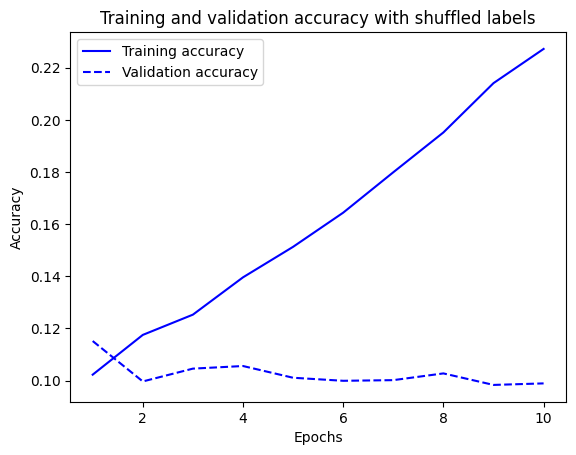

In [2]:
# TRY2_Fitting a MNIST model with randomly shuffled labels.Visualize training accuracy and validation accuracy
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten images to 1D array
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Shuffle the labels randomly
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

# Build and compile the model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model with shuffled labels
history = model.fit(train_images, random_train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# Plot training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "b-", label="Training accuracy")
plt.plot(epochs, val_acc, "b--", label="Validation accuracy")
plt.title("Training and validation accuracy with shuffled labels")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_random = model2.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

# MNIST 데이터셋을 로드하고, train_images와 train_labels로 나눕니다.
# train_images를 28x28 크기의 60,000개의 이미지 배열로 변환합니다.
# 이후, train_images를 255로 나누어 0에서 1사이의 값으로 스케일링합니다.
# random_train_labels은 train_labels를 복사하여 만든 배열로, train_labels의 값을 랜덤하게 섞은 것입니다.
# Dense 레이어를 2개로 쌓아 신경망을 만듭니다. 두 레이어는 각각 512와 10개의 노드를 가집니다.
# 마지막 레이어는 10개의 노드를 가지며, softmax 활성화 함수를 사용합니다.
# 모델을 컴파일합니다. 오차 함수는 sparse_categorical_crossentropy, 옵티마이저는 rmsprop을 사용하며, 평가 지표는 accuracy입니다.
# train_images와 random_train_labels를 사용하여 모델을 학습합니다.
# 100 에포크를 수행하며, 배치 크기는 128로 지정하고, 학습 데이터의 20%를 검증 데이터로 사용합니다.

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3153 - accuracy: 0.1025 - val_loss: 2.3042 - val_accuracy: 0.1032
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2991 - accuracy: 0.1183 - val_loss: 2.3126 - val_accuracy: 0.1103
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2910 - accuracy: 0.1272 - val_loss: 2.3155 - val_accuracy: 0.1073
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2780 - accuracy: 0.1400 - val_loss: 2.3296 - val_accuracy: 0.1023
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2621 - accuracy: 0.1529 - val_loss: 2.3287 - val_accuracy: 0.1020
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2424 - accuracy: 0.1657 - val_loss: 2.3545 - val_accuracy: 0.1063
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2196 - accuracy: 0.1809 - val_loss: 2.3620 - val_accuracy: 0.1059

ValueError: ignored

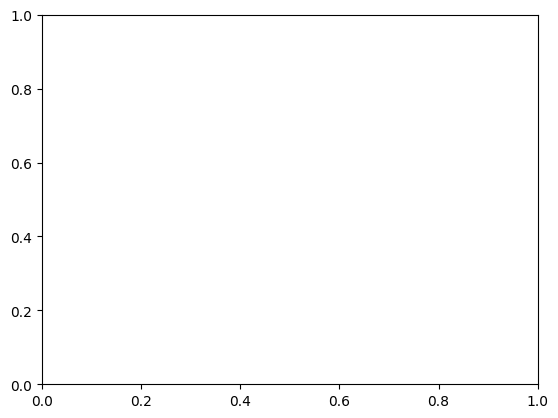

In [6]:
import matplotlib.pyplot as plt
val_acc_random = history_random.history["val_accuracy"]
train_acc_random = history_random.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_random, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()